<a href="https://colab.research.google.com/github/ThiagoPedrazi/MVP_Puc/blob/MVP_PUC_ThiagoPedrazi/MVP_ThiagoPedrazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pós Graduação Ciência de Dados - PUC Rio**

## MVP Sprint 1 - Análise de Dados e Boas Práticas
## *Notebook de Análise Exploratória do Indicador que mede a Quantidade de Visitantes em um Parque de Turismo - PAX*

### Thiago Pedrazi
### Mai/23

# 1) Problema de Negócio 💡

Esse Dataset é sobre a quantidade de visitantes que um determinado Parque de Turismo localizado no Rio de Janeiro recebe diariamente. É um indicador muito conhecido na Área Turismo chamado Pax. Ou seja, a partir do momento que uma pessoa entra nesse Parque de Turismo, ela é considerada um Pax. Esse Pax passa a ter diversos tipos de comportamentos que precisam ser medidos e analisados a fim de obter informações valiosas para a partes interessadas.

Esse Dataset é um problema de Aprendizado Supervisionado, mas precisamente Regressão. Nesse momento o objetivo é fazer a Análise Exploratória de Dados a fim obter conhecimento e responder dúvidas de negócio. O Objetivo final é fazer a predição da quantidade estimada de visitantes (Pax) que esse Parque de Turismo vai receber futuramente.

O Dataset é um conjunto de teste e os dados são de 2022 de 01/Jan a 31/Dez. Não há nenhum tipo de restrição aos dados.

Esse Dataset é uma base de dados real, então algumas colunas tiveram seus atributos alterados para nomes fictícios por questões de segurança.

# 2) Importando as bibliotecas 📚:

In [56]:
# Carregar Bibliotecas

# Manipulação de Data frames
import pandas as pd
import numpy as np

# Construção de gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D
from IPython.display import display, Markdown

# Formatação de Datas
from matplotlib.dates import DateFormatter

#warnings
import warnings 
warnings.filterwarnings('ignore')

# 3) Importação do Dataset 🎲

In [4]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ThiagoPedrazi/MVP_Puc/MVP_PUC_ThiagoPedrazi/DataSet_Pax"

# 4) Leitura do Arquivo ✔

In [5]:
# Lê o arquivo
Dataset_Pax = pd.read_csv(url, encoding = 'utf-8', delimiter = ';')

# 5) Dimensões do Dataset :
- 8868 Linhas
- 13 Colunas

In [6]:
# Mostra as dimensões do dataset
Dataset_Pax.shape

(8868, 13)

# 6) Informações do Dataset ℹ

Esse Dataset tem algumas colunas com atributos de Data, e algumas colunas relacionadas aos Bilhetes dos visitantes que foram ao Parque; 

A coluna "Pax" se refere a quantidade de visitantes daquele "Tipo de Bilhete" que compareceram ao Parque em uma determinada Data.

E por fim temos a Coluna "Clima", pois é uma variável que pode influenciar na quantidade de Pax no Parque, mas que nesse momento será mais utilizada para análise na Sprint 2.

In [7]:
# Mostra as informações do dataset
Dataset_Pax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8868 entries, 0 to 8867
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Data             8868 non-null   object 
 1   Ano              8868 non-null   int64  
 2   Mes              8868 non-null   object 
 3   Mes_Abrev        8868 non-null   object 
 4   Dia              8868 non-null   int64  
 5   Dia_Semana       8868 non-null   object 
 6   Dia_Abrev        8868 non-null   object 
 7   Clima            8868 non-null   object 
 8   Categoria        8868 non-null   object 
 9   Bilhete          8868 non-null   object 
 10  Tipo_de_Bilhete  8868 non-null   object 
 11  Política         8868 non-null   object 
 12  Pax              8863 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 900.8+ KB


# 7) Sumário Estatístico ✍

Esse resumo com algumas estatísticas já entrega alguns pontos de entendimentos e insights, exemplo:
- No item 5 do MVP, diz que tem 8868 Linhas no Dataset, mas nesse resumo estatístico no Count da coluna Pax diz que tem 8863, ou seja, existem algo a ser investigado; Vamos explorar isso nas próximas etapas;
- Notem que o mínimo e o máximo podem variar de 1 a 2800; Isso é normal, devido a natureza do negócio, então não se trata de "outliers"; Ou seja, tem alguns bilhetes tem uma frequência maior no Parque e outros bilhetes que tem uma menor frequência no Parque.

**Obs**: É importante entender nesse Dataset, que quando falamos de Pax, estamos falando de um perfil de visitante nesse Parque de Turismo. Ou seja, podemos ter vários tipos de perfis de visitantes, e para cada perfil, existe um Tipo de Bilhete existente; Exemplo de perfis:
- Turista Estrangeiro de outros países;
- Turista Nacional (de outros estados do Brasil);
- Nascidos no Rio de Janeiro (Já que é um parque de turismo localizado no Rio de Janeiro);
- Crianças (de 3 a 12 anos);
- Jovem (de 13 a 21 anos);
- Idoso (+60 anos);
- Trilheiros (Já que esse parque de turismo também pode ser acessado a partir de trilhas);
- Etc.

Então notem que existem n tipos de perfis de visitantes, e para cada perfil existe um "Tipo de Bilhete" pré-definido.

In [8]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)

Dataset_Pax.describe()

,Ano,Dia,Pax
count,8868.0,8868.000000,8863.000000
mean,2022.0,15.846527,143.579149
std,0.0,8.741931,263.455900
min,2022.0,1.000000,1.000000
25%,2022.0,8.000000,7.000000
50%,2022.0,16.000000,30.000000
75%,2022.0,23.000000,156.000000
max,2022.0,31.000000,2800.000000


# 8) Leitura das 20 primeiras linhas do Dataset

O Objetivo aqui é conhecer um pouco mais do Dataset:

Temos algumas colunas com atributos relacionado a Data, e algumas colunas com atributos relacionado aos Bilhetes dos visitantes que foram ao Parque; Notem que na linha 0 e 1 temos dois "Tipos de Bilhetes" diferentes, mas que pertencem a Categoria 1; Então a Categoria serve como um "agrupador", normalmente agrupando mais de 1 bilhete e mais de 1 Tipo de Bilhete; Do mesmo modo que um "Bilhete" agrupa mais de um "Tipo de Bilhete". Em muitos momentos não é necessário fazer análises por Tipo de Bilhete, ou seja, analisar por Categoria/Bilhete já responde diversas dúvidas de negócio. O que é vendido nesse Parque, são os "Tipos de Bilhetes", mas como são muitos devido a natureza do Negócio, foram criados formas de agrupar esses "Tipos de Bilhetes"; E esses agrupadores, são as colunas "Categoria" e "Bilhete".

Temos também a coluna "Política", com 4 Políticas; A idéia aqui é similar a um cenário de um Cinema por exemplo, onde se tem Inteira e Meia, mas no caso desse Parque de Turismo, existem 4 Tipos de Política.

A coluna "Pax" se refere a quantidade de visitantes daquele "Tipo de Bilhete" que compareceram ao Parque em uma determinada Data.

E por fim temos a Coluna "Clima", pois é uma variável que pode influenciar na quantidade de Pax no Parque, mas que nesse momento será mais utilizada para análise na Sprint 2.

In [9]:
# Exibindo as 20 primeiras linhas do Dataset

Dataset_Pax.head(20)

,Data,Ano,Mes,Mes_Abrev,Dia,Dia_Semana,Dia_Abrev,Clima,Categoria,Bilhete,Tipo_de_Bilhete,Política,Pax
0,01/01/2022,2022,Janeiro,Jan,1,Sábado,Sab,Nublado/Chuva Parcial,Categoria 1,Bilhete 6,Tipo de Bilhete 9,Política 1,44.0
1,01/01/2022,2022,Janeiro,Jan,1,Sábado,Sab,Nublado/Chuva Parcial,Categoria 1,Bilhete 8,Tipo de Bilhete 13,Política 2,21.0
2,01/01/2022,2022,Janeiro,Jan,1,Sábado,Sab,Nublado/Chuva Parcial,Categoria 2,Bilhete 1,Tipo de Bilhete 1,Política 1,1861.0
3,01/01/2022,2022,Janeiro,Jan,1,Sábado,Sab,Nublado/Chuva Parcial,Categoria 2,Bilhete 2,Tipo de Bilhete 6,Política 2,155.0
4,01/01/2022,2022,Janeiro,Jan,1,Sábado,Sab,Nublado/Chuva Parcial,Categoria 2,Bilhete 2,Tipo de Bilhete 2,Política 2,402.0
5,01/01/2022,2022,Janeiro,Jan,1,Sábado,Sab,Nublado/Chuva Parcial,Categoria 2,Bilhete 2,Tipo de Bilhete 18,Política 2,4.0
6,01/01/2022,2022,Janeiro,Jan,1,Sábado,Sab,Nublado/Chuva Parcial,Categoria 2,Bilhete 2,Tipo de Bilhete 12,Política 2,28.0
7,01/01/2022,2022,Janeiro,Jan,1,Sábado,Sab,Nublado/Chuva Parcial,Categoria 2,Bilhete 2,Tipo de Bilhete 3,Política 2,246.0
8,01/01/2022,2022,Janeiro,Jan,1,Sábado,Sab,Nublado/Chuva Parcial,Categoria 2,Bilhete 2,Tipo de Bilhete 16,Política 2,23.0
9,01/01/2022,2022,Janeiro,Jan,1,Sábado,Sab,Nublado/Chuva Parcial,Categoria 2,Bilhete 2,Tipo de Bilhete 5,Política 2,159.0


# 9) Leitura das últimas 20 linhas do Dataset

Ler as últimas linhas do Dataset é importante pois nesse caso já conseguimos identificar missings; Nas últimas 5 linhas é possível identificar que a coluna "Pax" está em branco; Provavelmente algum tipo de problema no Banco de Dados. Porém na etapa de Pré-processamento teremos a oportunidade de fazer os devidos tratamentos.

In [10]:
Dataset_Pax.tail(20)

,Data,Ano,Mes,Mes_Abrev,Dia,Dia_Semana,Dia_Abrev,Clima,Categoria,Bilhete,Tipo_de_Bilhete,Política,Pax
8848,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 3,Bilhete 3,Tipo de Bilhete 4,Política 1,234.0
8849,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 3,Bilhete 3,Tipo de Bilhete 20,Política 1,9.0
8850,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 3,Bilhete 9,Tipo de Bilhete 14,Política 2,36.0
8851,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 4,Bilhete 11,Tipo de Bilhete 22,Política 4,34.0
8852,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 5,Bilhete 4,Tipo de Bilhete 7,Política 3,1526.0
8853,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 6,Bilhete 10,Tipo de Bilhete 33,Política 4,19.0
8854,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 6,Bilhete 10,Tipo de Bilhete 17,Política 4,12.0
8855,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 6,Bilhete 10,Tipo de Bilhete 23,Política 4,3.0
8856,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 6,Bilhete 10,Tipo de Bilhete 19,Política 4,36.0
8857,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 8,Bilhete 12,Tipo de Bilhete 27,Política 1,4.0


# 10) Análise de Missing

Nesse item podemos identificar que temos valores Missing apenas nas últimas 5 linhas do Data frame na Coluna "Pax".

In [11]:
#Exibição dos valores Missing

Dataset_Pax[Dataset_Pax['Pax'].isnull()]

,Data,Ano,Mes,Mes_Abrev,Dia,Dia_Semana,Dia_Abrev,Clima,Categoria,Bilhete,Tipo_de_Bilhete,Política,Pax
8863,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 9,Bilhete 7,Tipo de Bilhete 15,Política 2,NaN
8864,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 9,Bilhete 7,Tipo de Bilhete 15,Política 2,NaN
8865,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 9,Bilhete 7,Tipo de Bilhete 15,Política 2,NaN
8866,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 9,Bilhete 7,Tipo de Bilhete 15,Política 2,NaN
8867,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 9,Bilhete 7,Tipo de Bilhete 15,Política 2,NaN


# 11) Tratamento de valores Missing (NaN)

In [12]:
# Criando uma cópia do Data frame original para fazer o tratamento

Dataset_Pax_Sem_Missings = Dataset_Pax

In [13]:
# Ler as últimas 20 linhas da cópia do Data frame para confirmar a presença de Missing

Dataset_Pax_Sem_Missings.tail(20)

,Data,Ano,Mes,Mes_Abrev,Dia,Dia_Semana,Dia_Abrev,Clima,Categoria,Bilhete,Tipo_de_Bilhete,Política,Pax
8848,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 3,Bilhete 3,Tipo de Bilhete 4,Política 1,234.0
8849,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 3,Bilhete 3,Tipo de Bilhete 20,Política 1,9.0
8850,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 3,Bilhete 9,Tipo de Bilhete 14,Política 2,36.0
8851,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 4,Bilhete 11,Tipo de Bilhete 22,Política 4,34.0
8852,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 5,Bilhete 4,Tipo de Bilhete 7,Política 3,1526.0
8853,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 6,Bilhete 10,Tipo de Bilhete 33,Política 4,19.0
8854,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 6,Bilhete 10,Tipo de Bilhete 17,Política 4,12.0
8855,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 6,Bilhete 10,Tipo de Bilhete 23,Política 4,3.0
8856,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 6,Bilhete 10,Tipo de Bilhete 19,Política 4,36.0
8857,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 8,Bilhete 12,Tipo de Bilhete 27,Política 1,4.0


In [14]:
# eliminando linhas que tenham algum valor missiing

Dataset_Pax_Sem_Missings = Dataset_Pax_Sem_Missings.dropna (how = 'any')

In [15]:
# Ler novamente as últimas 20 linhas da cópia do Data frame original, só que agora sem a presença de Missing

Dataset_Pax_Sem_Missings.tail(20)

,Data,Ano,Mes,Mes_Abrev,Dia,Dia_Semana,Dia_Abrev,Clima,Categoria,Bilhete,Tipo_de_Bilhete,Política,Pax
8843,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 2,Bilhete 2,Tipo de Bilhete 3,Política 2,86.0
8844,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 2,Bilhete 2,Tipo de Bilhete 30,Política 2,145.0
8845,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 2,Bilhete 2,Tipo de Bilhete 40,Política 2,666.0
8846,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 2,Bilhete 2,Tipo de Bilhete 16,Política 2,4.0
8847,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 2,Bilhete 2,Tipo de Bilhete 5,Política 2,242.0
8848,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 3,Bilhete 3,Tipo de Bilhete 4,Política 1,234.0
8849,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 3,Bilhete 3,Tipo de Bilhete 20,Política 1,9.0
8850,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 3,Bilhete 9,Tipo de Bilhete 14,Política 2,36.0
8851,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 4,Bilhete 11,Tipo de Bilhete 22,Política 4,34.0
8852,31/12/2022,2022,Dezembro,Dez,31,Sábado,Sab,Tempo Aberto,Categoria 5,Bilhete 4,Tipo de Bilhete 7,Política 3,1526.0


# 12) Análise Exploratória de Dados 📈

In [16]:
# Algumas análises exploratórias que são usadas na prática mesmo no dia a dia dessa empresa de Turismo
# Algumas varíaveis foram criadas abaixo:

Pax_Máx = Dataset_Pax_Sem_Missings['Pax'].max()
Pax_Mín = Dataset_Pax_Sem_Missings['Pax'].min()
Total_Pax = Dataset_Pax_Sem_Missings['Pax'].sum()
Contagem_linhas = Dataset_Pax_Sem_Missings['Pax'].count()
Contagem_Distinta_Datas = Dataset_Pax_Sem_Missings['Data'].nunique()
Média_Diária_Pax = Total_Pax / Contagem_Distinta_Datas

In [17]:
# Comando print para imprimir o retorno dos cálculos que foram feitos nas variáveis

print ("Obs: Pax = Visitantes")
print("O maior valor de Pax de um Bilhete foi " +str (Pax_Máx))
print("O menor valor de Pax de um Bilhete foi " +str (Pax_Mín))
print("O Total de Pax que esse Parque recebeu em 2022 foi de " +str (Total_Pax))
print("Esse Dataset possui o total de linhas de " +str (Contagem_linhas))
print("Esse Parque de Turismo em 2022 ficou aberto pelo total de dias = " +str (Contagem_Distinta_Datas))
print("Esse Parque de Turismo recebeu em média diária o nº de visitantes = " +str (Média_Diária_Pax))

Obs: Pax = Visitantes
O maior valor de Pax de um Bilhete foi 2800.0
O menor valor de Pax de um Bilhete foi 1.0
O Total de Pax que esse Parque recebeu em 2022 foi de 1272542.0
Esse Dataset possui o total de linhas de 8863
Esse Parque de Turismo em 2022 ficou aberto pelo total de dias = 365
Esse Parque de Turismo recebeu em média diária o nº de visitantes = 3486.4164383561642


In [18]:
# Um overview dos atributos da coluna "Categoria"
# É possível identificar 9 Categorias distintas

Dataset_Pax_Sem_Missings['Categoria'].value_counts()

Categoria 2    3457
Categoria 9    1394
Categoria 6    1011
Categoria 3     970
Categoria 1     654
Categoria 8     506
Categoria 5     365
Categoria 4     320
Categoria 7     186
Name: Categoria, dtype: int64

In [19]:
# Um overview dos atributos da coluna "Bilhete"
# É possível identificar 14 Bilhetes distintos

Dataset_Pax_Sem_Missings['Bilhete'].value_counts()

Bilhete 2     2707
Bilhete 10    1011
Bilhete 5      704
Bilhete 7      690
Bilhete 1      517
Bilhete 12     506
Bilhete 9      488
Bilhete 3      482
Bilhete 4      365
Bilhete 6      347
Bilhete 11     320
Bilhete 8      307
Bilhete 14     233
Bilhete 13     186
Name: Bilhete, dtype: int64

In [20]:
# Um overview dos atributos da coluna "Bilhete"
# É possível identificar 55 Tipos de Bilhetes distintos; Isso reforça o entendimento do quanto o perfil de visitantes nesse Parque de Turismo pode variar.

Dataset_Pax_Sem_Missings['Tipo_de_Bilhete'].value_counts()

Tipo de Bilhete 5     365
Tipo de Bilhete 4     365
Tipo de Bilhete 1     365
Tipo de Bilhete 6     365
Tipo de Bilhete 2     365
Tipo de Bilhete 7     365
Tipo de Bilhete 3     365
Tipo de Bilhete 14    359
Tipo de Bilhete 16    358
Tipo de Bilhete 8     355
Tipo de Bilhete 11    349
Tipo de Bilhete 9     347
Tipo de Bilhete 10    346
Tipo de Bilhete 15    344
Tipo de Bilhete 22    320
Tipo de Bilhete 13    307
Tipo de Bilhete 12    303
Tipo de Bilhete 40    299
Tipo de Bilhete 33    297
Tipo de Bilhete 19    284
Tipo de Bilhete 26    207
Tipo de Bilhete 17    198
Tipo de Bilhete 32    160
Tipo de Bilhete 49    152
Tipo de Bilhete 29    152
Tipo de Bilhete 30    145
Tipo de Bilhete 18    142
Tipo de Bilhete 21    129
Tipo de Bilhete 20    117
Tipo de Bilhete 52     81
Tipo de Bilhete 27     64
Tipo de Bilhete 34     57
Tipo de Bilhete 23     55
Tipo de Bilhete 28     50
Tipo de Bilhete 35     45
Tipo de Bilhete 36     35
Tipo de Bilhete 45     33
Tipo de Bilhete 55     32
Tipo de Bilh

In [21]:
# Apenas confirmando o que foi comentado acima, 55 Tipos de Bilhetes distintos
Dataset_Pax_Sem_Missings['Tipo_de_Bilhete'].nunique()

55

In [22]:
# Gerando uma série da Coluna Pax linha a linha e reforçando a ausência de Missing

Dataset_Pax_Sem_Missings['Pax']

0         44.0
1         21.0
2       1861.0
3        155.0
4        402.0
         ...  
8858       2.0
8859      42.0
8860      38.0
8861      86.0
8862      55.0
Name: Pax, Length: 8863, dtype: float64

# 13) Visualizações

Nesse gráfico de barras abaixo conseguimos ter um Insight bem relevante sobre qual Categoria soma mais Pax; Confome comentado ao longo do MVP, Pax é um visitante, que é um perfil que precisa ser analisado pois traz uma série de comportamentos. Aqui vemos que a Categoria 2 é bem forte, com quase 800 mil visitantes em 2022. Mais de 60% dos visitantes desse Parque pertencem a essa Categoria.
Lembrando que Categoria é um agrupador de Bilhetes e Tipos de Bilhetes que é usado nesse Parque de Turismo para otimizar as análises.

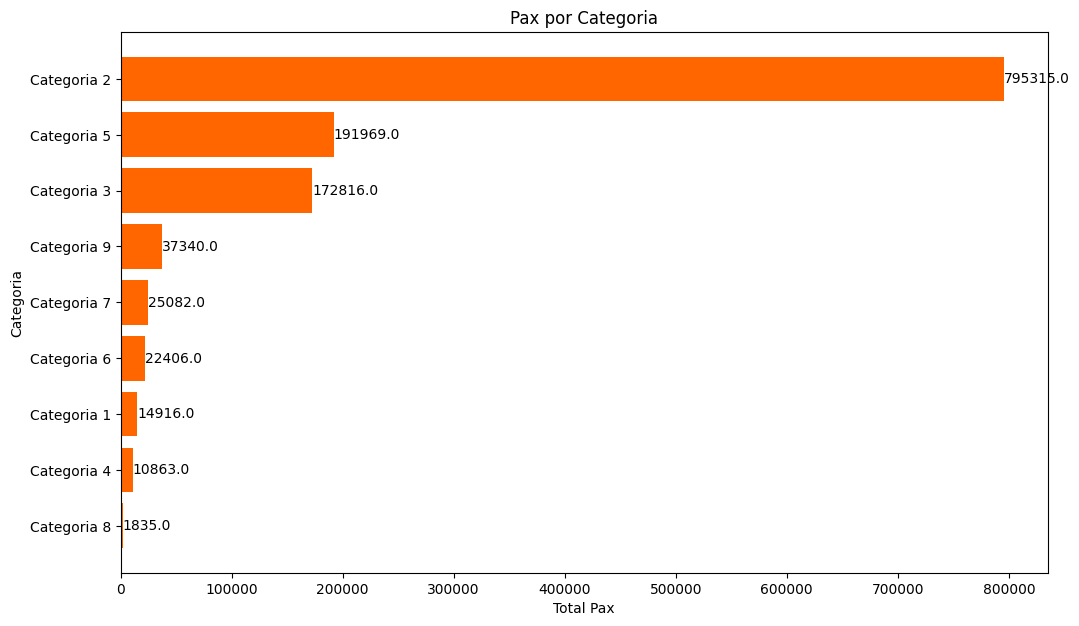

In [48]:
# Agrupar por categoria e somar os valores de Pax por Categoria
df_grouped = Dataset_Pax_Sem_Missings.groupby('Categoria')['Pax'].sum()

# Criar um novo DataFrame com as somas de Pax por categoria
df_Pax_Por_Categoria = pd.DataFrame({'Categoria': df_grouped.index, 'Total_Pax': df_grouped.values})

# Ordenar o DataFrame em ordem decrescente com base na soma de Pax
df_Pax_Por_Categoria = df_Pax_Por_Categoria.sort_values(by='Total_Pax', ascending=True)

# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Criar um gráfico de barras horizontais com a soma de Pax por categoria
plt.barh(df_Pax_Por_Categoria['Categoria'], df_Pax_Por_Categoria['Total_Pax'], color='#FF6600')

# Adicionar rótulos de dados em cada barra
for i, value in enumerate(df_Pax_Por_Categoria['Total_Pax']):
    plt.text(value, i, str(value), ha='left', va='center')

# Definir o título do gráfico e dos eixos
plt.title('Pax por Categoria')
plt.xlabel('Total Pax')
plt.ylabel('Categoria')

# Exibir o gráfico
plt.show()



Nesse gráfico de barras abaixo conseguimos ter um Insight bem relevante sobre qual ou quais Bilhete(s) somam mais Pax; Confome vamos descendo num nível mais detalhado nas análises (conhecido como Drill Down em Business Intelligence), aqui nesse caso analisando por Bilhete, já temos um pouco mais de equilíbrio; Conseguimos verificar que os Bilhetes 1 e 2 somam valores próximos de Pax (girando em torno de 340 mil - 350 mil de Pax); Em valores percentuais isso quer dizer que 54% do perfil de visitantes desse Parque são desses bilhetes.

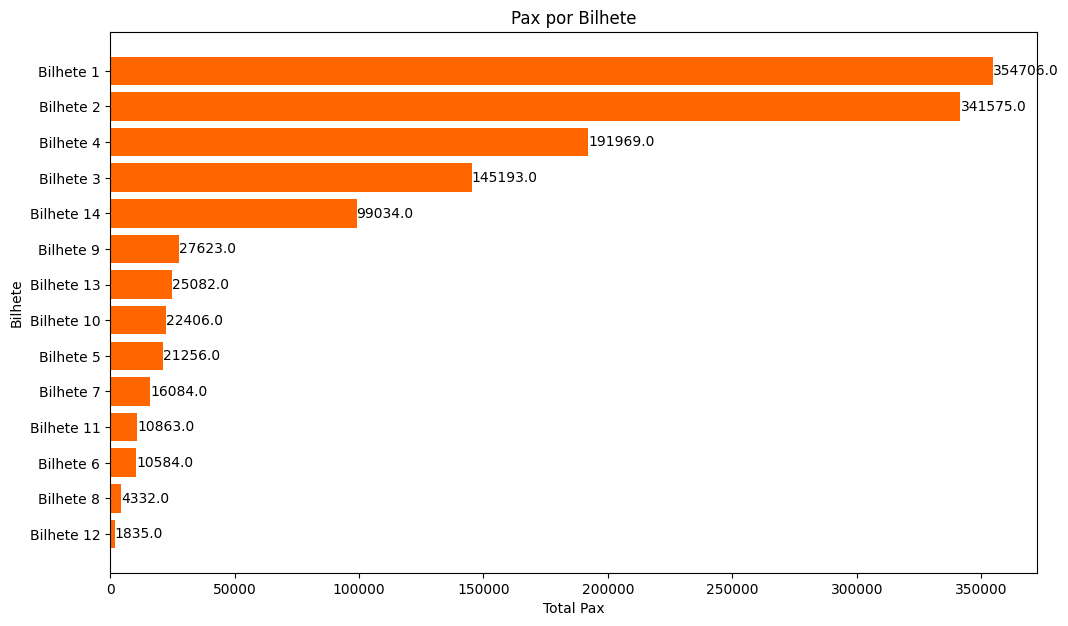

In [47]:
# Agrupar por Bilhete e somar os valores de Pax por Bilhete
df_grouped = Dataset_Pax_Sem_Missings.groupby('Bilhete')['Pax'].sum()

# Criar um novo DataFrame com a soma de Pax por Bilhete
df_Pax_Por_Bilhete = pd.DataFrame({'Bilhete': df_grouped.index, 'Total_Pax': df_grouped.values})

# Ordenar o DataFrame em ordem decrescente com base na soma de Pax
df_Pax_Por_Bilhete = df_Pax_Por_Bilhete.sort_values(by='Total_Pax', ascending=True)

# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Criar um gráfico de barras horizontais com a soma de Pax por Bilhete
plt.barh(df_Pax_Por_Bilhete['Bilhete'], df_Pax_Por_Bilhete['Total_Pax'], color='#FF6600')

# Adicionar rótulos de dados em cada barra
for i, value in enumerate(df_Pax_Por_Bilhete['Total_Pax']):
    plt.text(value, i, str(value), ha='left', va='center')

# Definir o título do gráfico e dos eixos
plt.title('Pax por Bilhete')
plt.xlabel('Total Pax')
plt.ylabel('Bilhete')

# Exibir o gráfico
plt.show()

Nesse gráfico de barras abaixo conseguimos ter um Insight bem relevante sobre qual Política é mais forte ou menos forte; Conforme falado ao longo do MVP, política aqui é parecido com um cenário de um Cinema, onde se tem Inteira e Meia, mas no caso desse Parque de Turismo, existem 4 Políticas vigentes. Conseguimos identificar que a Política 1 é bem forte. 
Fica a reflexão: É um Parque de Turismo voltado para Adultos ou Crianças? 


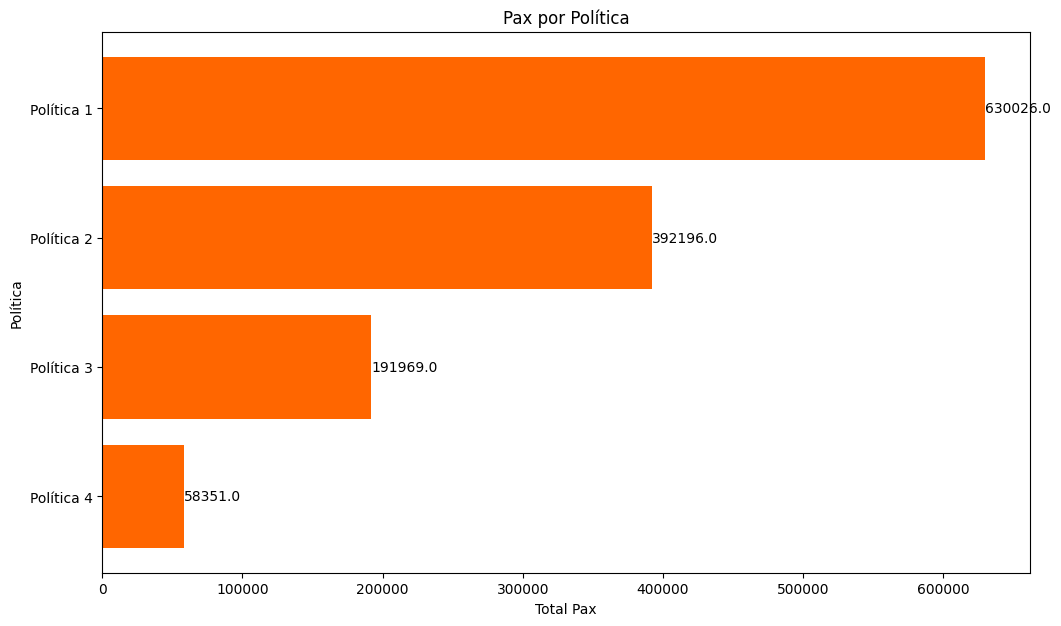

In [46]:
# Agrupar por Política e somar os valores de Pax por Política
df_grouped = Dataset_Pax_Sem_Missings.groupby('Política')['Pax'].sum()

# Criar um novo DataFrame com a soma de Pax por Política
df_Pax_Por_Política = pd.DataFrame({'Política': df_grouped.index, 'Total_Pax': df_grouped.values})

# Ordenar o DataFrame em ordem decrescente com base na soma de Pax
df_Pax_Por_Política = df_Pax_Por_Política.sort_values(by='Total_Pax', ascending=True)

# Prepara a figura (fig) e a área do gráfico (ax) com largura 10 e altura 6 (em polegadas)
fig, ax = plt.subplots(figsize = (10, 6))

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Criar um gráfico de barras horizontais com a soma de Pax por Política
plt.barh(df_Pax_Por_Política['Política'], df_Pax_Por_Política['Total_Pax'], color='#FF6600')

# Adicionar rótulos de dados em cada barra
for i, value in enumerate(df_Pax_Por_Política['Total_Pax']):
    plt.text(value, i, str(value), ha='left', va='center')

# Definir o título do gráfico e dos eixos
plt.title('Pax por Política')
plt.xlabel('Total Pax')
plt.ylabel('Política')

# Exibir o gráfico
plt.show()

Similiar a análise anterior, só que nesse gráfico de pizza podemos ter uma percepção de Share por Política; A Política 1 chega a quase 50% de Share; Bem forte!
Fica a reflexão: É um Parque de Turismo voltado para Adultos ou Crianças?

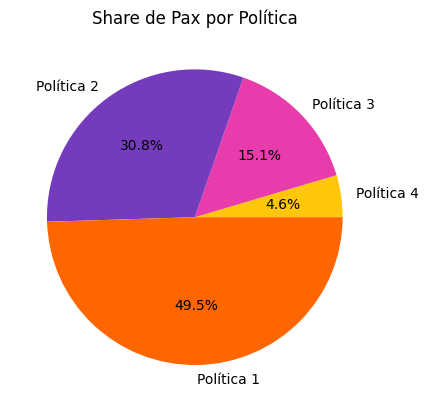

In [28]:
# Agrupar por Política e somar os valores de Pax em cada política
df_grouped = Dataset_Pax_Sem_Missings.groupby('Política')['Pax'].sum()

# Criar um novo DataFrame com a soma de Pax por Política
df_Pax_Por_Política_Pizza = pd.DataFrame({'Política': df_grouped.index, 'Total_Pax': df_grouped.values})

# Ordenar o DataFrame em ordem decrescente com base na soma de Pax
df_Pax_Por_Política_Pizza = df_Pax_Por_Política_Pizza.sort_values(by='Total_Pax', ascending=True)

# Definir as cores para cada política
colors = ['#FFC60A', '#E93CAC', '#753BBD', '#FF6600']

# Plotar o gráfico de pizza
plt.pie(df_Pax_Por_Política_Pizza['Total_Pax'], labels=df_Pax_Por_Política_Pizza['Política'], colors=colors, autopct='%1.1f%%')

# Adicionar legendas e rótulos de dados
plt.title('Share de Pax por Política')

# Exibir o gráfico
plt.show()

Análise de Pax por Mês: Conseguimos identificar um 2º Semestre mais forte que o 1º Semestre de um modo geral; Em Julho temos um pico forte de Pax, e isso se deve pois Julho é mês de férias escolares, então muitas famílias gostam de tirar férias com seus filhos para viajar/passear, e esse Parque de Turismo em Julho recebe esse perfil de visitante; Tivemos também um crescimento de Pax em Outubro, e isso se deve pois Outubro é mês das crianças, então muitas famílias gostam de aproveitar o mês de Outubro viajando/passeando; Novembro e Dezembro também foi forte, e isso se deve ao Período da Copa do Mundo de 2022 no Catar; Esse Parque Turismo teve eventos e transmissões dos jogos durante os meses de Novembro e Dezembro atraindo muito Pax; Notem como existe muita sazonalidade nesse Parque de Turismo, e através da análise Exploratória de Dados podemos identificar muitos pontos importantes.   

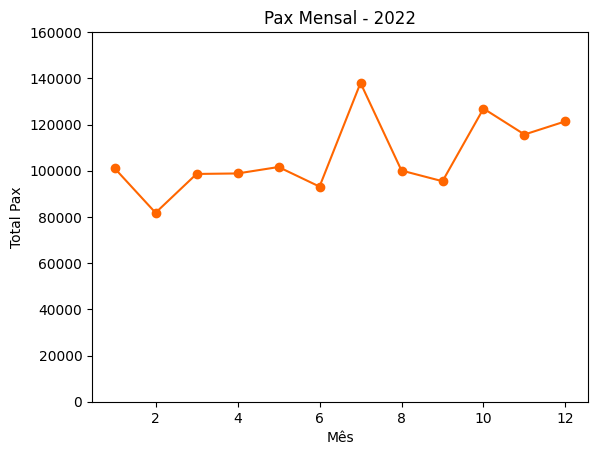

In [45]:
# Converter a coluna de datas para o tipo de dados datetime
Dataset_Pax_Sem_Missings['Data'] = pd.to_datetime(Dataset_Pax_Sem_Missings['Data'])

# Criar uma coluna adicional com o mês correspondente a cada data
Dataset_Pax_Sem_Missings['Mês'] = Dataset_Pax_Sem_Missings['Data'].dt.month

# Filtrar o DataFrame para incluir apenas os dados de 2022 // Apenas uma confirmação que realmente são os dados de 2022
Dataset_Pax_2022 = Dataset_Pax_Sem_Missings[Dataset_Pax_Sem_Missings['Data'].dt.year == 2022]

# Agrupar por mês e somar os valores de Pax em cada mês
df_grouped = Dataset_Pax_2022.groupby('Mês')['Pax'].sum()

# Criar um novo DataFrame com as somas de Pax por mês
df_Pax_Mensal = pd.DataFrame({'Mês': df_grouped.index, 'Total_Pax': df_grouped.values})

# Plotar o gráfico de linhas
plt.plot(df_Pax_Mensal['Mês'], df_Pax_Mensal['Total_Pax'], marker='o', color='#FF6600')

# Definir o título do gráfico e dos eixos
plt.title('Pax Mensal - 2022')
plt.xlabel('Mês')
plt.ylabel('Total Pax')

# Definir o valores do eixo Y entre 0 e 160000
plt.ylim(ymin=0)
plt.ylim(ymax=160000)

# Exibir o gráfico
plt.show()

Análise Mensal de Pax por Política: Essa análise é similar a anterior, porém abrindo por Política para entender se existe algum ponto que chama atenção; Um ponto que chama a atenção é que Setembro a Política 1 cai, e a Política 2 cresce; Em Setembro de 2022 ocorreu o Rock in Rio no Rio de Janeiro e isso trouxe o Público da Política 2 para esse Parque de Turismo com mais frequência.

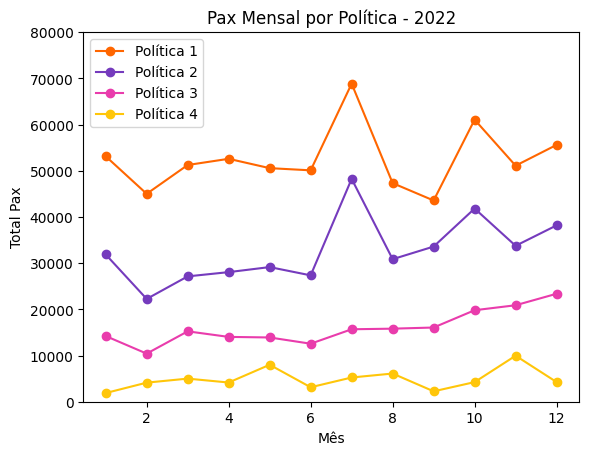

In [54]:
# Converter a coluna de datas para o tipo de dados datetime
Dataset_Pax_Sem_Missings['Data'] = pd.to_datetime(Dataset_Pax_Sem_Missings['Data'])

# Criar uma coluna adicional com o mês correspondente a cada data
Dataset_Pax_Sem_Missings['Mês'] = Dataset_Pax_Sem_Missings['Data'].dt.month

# Filtrar o DataFrame para incluir apenas os dados de 2022 // Apenas uma confirmação que realmente são os dados de 2022
Dataset_Pax_2022 = Dataset_Pax_Sem_Missings[Dataset_Pax_Sem_Missings['Data'].dt.year == 2022]

# Agrupar por mês e política e somar os valores de Pax em cada mês e política
df_grouped = Dataset_Pax_2022.groupby(['Mês', 'Política'])['Pax'].sum()

# Criar um novo DataFrame com as somas de Pax por mês e política
df_Pax_Por_Mes_Politica = pd.DataFrame({'Mês': df_grouped.index.get_level_values('Mês'),
                                       'Política': df_grouped.index.get_level_values('Política'),
                                       'Total_Pax': df_grouped.values})

# Definir as cores para cada tipo de política
colors = {'Política 1': '#FF6600', 'Política 2': '#753BBD', 'Política 3': '#E93CAC', 'Política 4': '#FFC60A'}

# Plotar o gráfico de linhas para cada tipo de política
for policy, color in colors.items():
    df_policy = df_Pax_Por_Mes_Politica[df_Pax_Por_Mes_Politica['Política'] == policy]
    plt.plot(df_policy['Mês'], df_policy['Total_Pax'], marker='o', color=color, label=policy)

# Definir o título do gráfico e dos eixos
plt.title('Pax Mensal por Política - 2022')
plt.xlabel('Mês')
plt.ylabel('Total Pax')
plt.legend(df_Pax_Por_Mes_Politica['Política'], loc='best')

# Definir o valores do eixo Y entre 0 e 160000
plt.ylim(ymin=0)
plt.ylim(ymax=80000)

# Exibir o gráfico
plt.show()

Análise Mensal de Pax por Categoria: A Categoria 1 é muito forte comparada as demais conforme conseguimos ver no gráfico; Em Julho a Categoria 1 e 2 crescem bastante indicando forte sazonalidade; Em Outubro (Mês das Crianças) a Categoria 1 e 2 crescem também; Um ponto chama a atenção: Uma tendência de crescimento no 2º semestre da Categoria 5.

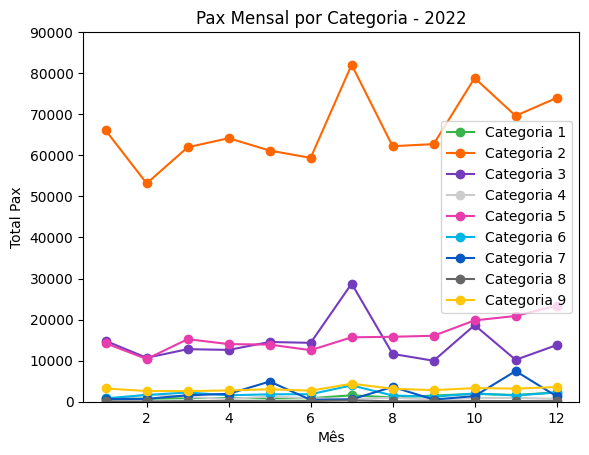

In [55]:
# Converter a coluna de datas para o tipo de dados datetime
Dataset_Pax_Sem_Missings['Data'] = pd.to_datetime(Dataset_Pax_Sem_Missings['Data'])

# Criar uma coluna adicional com o mês correspondente a cada data
Dataset_Pax_Sem_Missings['Mês'] = Dataset_Pax_Sem_Missings['Data'].dt.month

# Filtrar o DataFrame para incluir apenas os dados de 2022 // Apenas uma confirmação que realmente são os dados de 2022
Dataset_Pax_2022 = Dataset_Pax_Sem_Missings[Dataset_Pax_Sem_Missings['Data'].dt.year == 2022]

# Agrupar por mês e Categoria e somar os valores de Pax em cada mês e Categoria
df_grouped = Dataset_Pax_2022.groupby(['Mês', 'Categoria'])['Pax'].sum()

# Criar um novo DataFrame com a soma de Pax por mês e Categoria
df_Pax_Por_Mes_Categoria = pd.DataFrame({'Mês': df_grouped.index.get_level_values('Mês'),
                                       'Categoria': df_grouped.index.get_level_values('Categoria'),
                                       'Total_Pax': df_grouped.values})

# Definir as cores para cada tipo de Categoria
colors = {'Categoria 1': '#39B44A', 'Categoria 2': '#FF6600', 'Categoria 3': '#753BBD', 'Categoria 4': '#CCCCCC', 'Categoria 5': 
          '#E93CAC', 'Categoria 6': '#00B5E5', 'Categoria 7': '#0857C3', 'Categoria 8': '#666666', 'Categoria 9': '#FFC60A'}

# Plotar o gráfico de linhas para cada tipo de Categoria
for category, color in colors.items():
    df_category = df_Pax_Por_Mes_Categoria[df_Pax_Por_Mes_Categoria['Categoria'] == category]
    plt.plot(df_category['Mês'], df_category['Total_Pax'], marker='o', color=color, label=category)

# Definir o título do gráfico e dos eixos
plt.title('Pax Mensal por Categoria - 2022')
plt.xlabel('Mês')
plt.ylabel('Total Pax')
plt.legend(df_Pax_Por_Mes_Categoria['Categoria'], loc='best')

# Definir o valores do eixo Y entre 0 e 160000
plt.ylim(ymin=0)
plt.ylim(ymax=90000)

# Exibir o gráfico
plt.show()

# 14) Conclusões

A Análise Exploratória para esse Parque de Turismo é de extrema importância pois gera diversos insights importantes conforme podemos verificar ao longo do MVP; São muitos bilhetes vendidos, o que mostra diversos perfis de visitantes, e muitos períodos de sazonalidade conforme vimos no MVP;
Todas essas análises são importantes para que possamos conhecer melhor o negócio que estamos inserido e também para as próximas etapas da Pós-graduação já que o objetivo final é fazer predição do número de visitantes que esse Parque de Turismo irá receber nos próximos meses.